In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

# Thinkful Data Science Prep Capstone

## U.S. Net Foreign Investment And The Subprime Lending Crisis

- - - -


#### Submitted By: AJ Igherighe   |   Completion Date: January 25, 2018

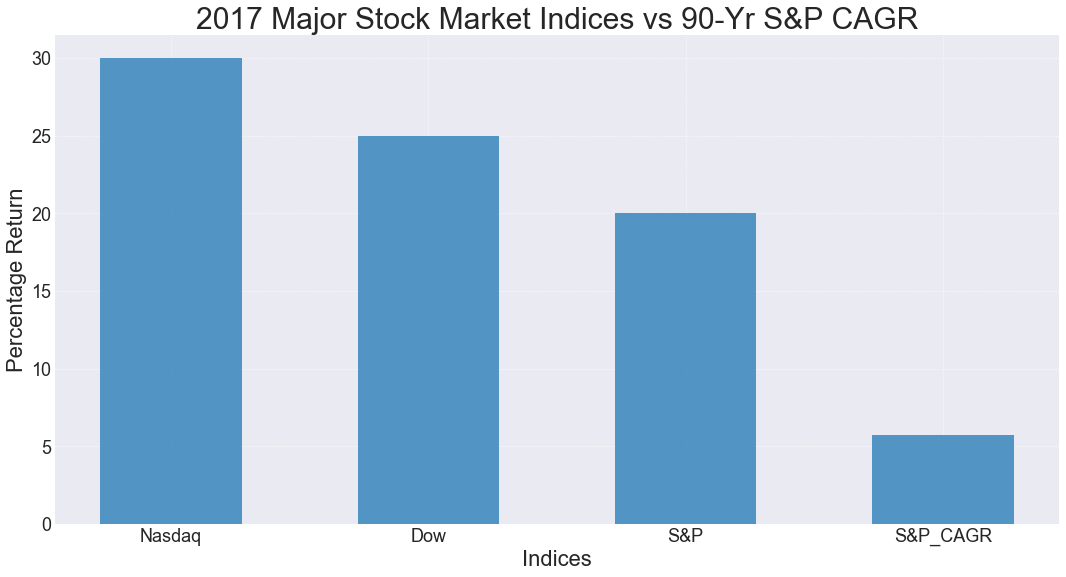

In [2]:
def create_barchart(data, values_column, xlabel, ylabel, title):
    """plot provided data into a bar chart"""
    fig = plt.figure(figsize=(18, 9))
    values = list(data[values_column])
    objects = (data.index)
    y_pos = np.arange(len(objects))
    bar_width = 0.55
    plt.bar(y_pos, values, bar_width, align='center', alpha=0.75)
    plt.xticks(y_pos, objects, size=18)
    plt.yticks(size=18)
    plt.xlabel(xlabel).set_size(22)
    plt.ylabel(ylabel).set_size(22)
    plt.title(title).set_size(30)
    plt.grid(linestyle='dotted')
    plt.show()

# prepare data for chart
# calclate historical S&P 500 compounded annual return (CAGR)
historical_returns_xl = pd.ExcelFile('./Data/historicalmarketreturns.xls')
sheetnames = list(historical_returns_xl.sheet_names)
sp_data = historical_returns_xl.parse(str(sheetnames[2]))

# clean up data
# delete unnecessary columns
sp_cols = sp_data.columns
sp_data.drop(sp_data.columns[[4, 5]], axis=1, inplace=True)

# insert new column adding dividend value to S&P value
new_col = 'S&P_Full'
sp_data['S&P_Full'] = sp_data['S&P 500'] + sp_data['Dividends']

# create the long term historical compounded annual growth rate (CAGR) for the S&P 500
years = int(len(sp_data[new_col][:]) - 1)
sp_start = float(sp_data[new_col][:1].copy())
sp_end = float(sp_data[new_col][-1:].copy())
total_return = sp_end / sp_start
cagr = (total_return ** (1 / years)) - 1
cagr_per = cagr * 100

# 2017 stock market gains from cnn money and CAGR calculated from NYU data
stock_gains = {
    # dictionary with 2017 stock market index data
    'Index': ['Nasdaq', 'Dow', 'S&P', 'S&P_CAGR'], 
    'Returns': [30, 25, 20, cagr_per]
}

# create and sort dataframe from dictionary
df_gains = pd.DataFrame.from_dict(stock_gains)
df_gains.set_index(keys='Index', inplace=True)

# create chart using barchart function
xlabel = 'Indices'
ylabel = 'Percentage Return'
graph_title = '2017 Major Stock Market Indices vs 90-Yr S&P CAGR'
data_column = 'Returns'

sns.set_style('dark')
# run function to create bar graph
create_barchart(df_gains, data_column, xlabel, ylabel, graph_title)

**Figure 1: 2017 Returns By Major US Indices**

## Background

The United States is in the midst of an usually favorable economic period.  This is evidenced, in part, by the stock market experiencing its second longest bull market in recorded history.  U.S. major index returns in 2017 further support this point. To put this in perspective, Figure 1 compares 2017 returns of the major U.S. indexes to the S&P 500's compounded annual return since 1927.  Not only did the Nasdaq exceed this historical benchmark by nearly 6x, but the S&P itself earned a nearly 4x greater return than we would expect from its own historical performance. [1](http://money.cnn.com/2018/01/02/investing/stock-market-2018-outlook/index.html) [2](http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html)

  Preliminary research suggest the reasons for these gains are obvious:  
* **Lower Market Capitalizations Following The Great Recession**.  Triggered by what is now commonly called the "Subprime Mortgage Crisis," which arguably started with the bankruptcy of New Century in April 2007 [3](https://www.federalreservehistory.org/essays/subprime_mortgage_crisis), the US economy experienced its greatest retraction since the Great Depression.  In turn, the stock market experienced significant declines. As an example, the Dow Jones Industrial Average, a composite of the 30 largest public companies by market capitalization and considered by many investors as the least volatile stocks, lost 50% of its value between October 8, 2007 and March 5, 2009.  However, the United States was not affected alone.  Some experts estimate stock market losses worldwide from the crisis and subsequent recession could be nearly 10 trillion USD. [4](https://www.investopedia.com/articles/economics/09/lehman-brothers-collapse.asp)

>> "Dozens of mortgage lenders declare bankruptcy in a matter of weeks. The market is filled with concerns of a major global credit crunch, which could affect all classes of borrowers. Central banks use emergency clauses to inject liquidity into scared financial markets. The real estate markets plummet after years of record highs. Foreclosure rates double year-over-year during the latter half of 2006 and in 2007." [5](https://www.investopedia.com/articles/07/subprime-overview.asp#ixzz54wBqEgCY)

* **A Massive Global Bailout, Stimulus, And Cheap Capital**.  Many argue with the actions taken to help institutions and homeowners during and following the subprime crisis.  However, Ryan Barnes' quote above (from an Investopedia article) paints a clear picture of how dire the situation appeared at the time.  Essentially, as markets panicked, concern emerged that, left unchecked, the subprime mortgage issue could spark a self-reinforcing liquidity crisis that could end in several key bankrupt financial institutions, and possibly even some governments.  By the time Lehman Brothers filed bankruptcy in Fall 2008 [4](https://www.investopedia.com/articles/economics/09/lehman-brothers-collapse.asp), the US government, arguably, had little choice but to take several decisive actions:
  * Seize Fannie Mae and Freddie Mac to prevent their failure and to reassure the mortgage lending markets.  
  
  * Present programs to encourage banks to re-configure loans for deliquent borrowers and those with mortgages exceed their current home values rather than rush to foreclose.  
  
  * Lower short-term interest rates effectively to 0% to encourage banks to borrow and inject liquidity into the market.  
  
  * Purchase mortgage-backed securities and long-term bonds allowing troubled insitutions to strengthen their balance sheets, infusing liquidity into the market directly, and encouraging other financial institutions to provide additional liquidity by reducing longer-term interest rates. [3](https://www.federalreservehistory.org/essays/subprime_mortgage_crisis)  

Now, that it appears the US, and many other nations (see supplemental section), have recovered from The Great Recession [6](https://www.cbpp.org/research/economy/chart-book-the-legacy-of-the-great-recession) and that the U.S., Britain, and several other developed nations appear to be going through a nationalist backlash to globalization (the latter is based on the election of Donald Trump, "Brexit", and other events outside the scope of this analysis), it raises interesting questions about the past, present, and future of foreign investment in the United States.  Specifically:

   

  **What have U.S. net foreign investment trends been historically?**
 
  **Did the Subprime Crisis impact these historical trends?**  

  **What are some of the key drivers that led to the pre-and-post crisis changes?**  



- - - -

## Following The Provided Capstone Methodology

To meet the requirements outlined in Unit 4 | Lesson 2 | Project 2, this *Analytic Report and Research Proposal* will follow these steps:

* **Describe the selected dataset**.  This analysis is conducted on U.S. Net Foreign Investment Data from the U.S. Department of Commerce's Bureau of Economic Analysis. [7](https://www.bea.gov/international/bp_web/tb_download_type_modern.cfm?list=2&RowID=144)


* **Ask and answer a set of analytical questions**. To the extent the data allows, we will address the three questions outlined at the end of the previous section.


* **Propose further research**. Finally, based on findings from the conducted analysis, the conclusion will contain ideas for additional exploration with skills and techniques from Thinkful's full bootcamp.

- - - -

## Exploring U.S. Net Investment Dataset

For this analysis, we are using data provided from the U.S. Department of Commerce's Bureau of Economic Analysis.  The data contains end of period information from 1976 to 2016 by year and by quarter (quarterly information started in 2006).  We downloaded the data in both its .xls or .csv formats.

For simplicity and speed, our preference was to work with the .csv formatted data.  However, after multiple failed attempts, we were forced to use the .xls formated data.  A review of the spreadsheet quickly showed the problem.  To incorporate both annual and quarterly data in the same file, both the .csv and .xls had unusual formatting likely as a result of converting directly from Microsoft Excel.  After removing the number of unnecessary leading columns and header rows, we were able to convert this to a "clean" .csv file that Pandas successfully imported.  Now, we are able to review our data a little deeper.

In [3]:
def create_dataframe(csv_file):
    """read a supplied csv file and returns a pandas dataframe"""
    try:
        data = pd.read_csv(csv_file)
        return data.copy()
    except:
        print('Error reading csv file into dataframe.')

file = './Data/annual_invest_data.csv'
data_start = create_dataframe(file)
print(data_start.head(3))
print('\nThis dataframe contains the expected international investment information.\n')
print(list(data_start.columns))
print('\nSome columns are in the proper format.')
print('\nThe actual financial information contained within the cells is {}'.format(type(data_start['1980'][0])))

  Line                                 Type of investment   1976  1977   \
0    1  U.S. net international investment position (li...  80539  98585   
1    2      Net international investment position excl...  80539  98585   
2    3      Financial derivatives other than reserves,...   n.a.   n.a.   

     1978   1979     1980   1981     1982   1983     ...        2007   \
0  128273  232250  296862  226992  238366  261494    ...     -1279493   
1  128273  232250  296862  226992  238366  261494    ...     -1350965   
2    n.a.    n.a.    n.a.    n.a.    n.a.    n.a.    ...        71472   

       2008     2009       2010     2011       2012     2013       2014  \
0  -3995303  -2627626  -2511788  -4454997  -4518300  -5372654  -6980245   
1  -4154938  -2753961  -2622170  -4541036  -4576076  -5450211  -7065777   
2    159635    126335    110382     86039     57776     77557     85532   

      2015       2016  
0  -7493479  -8318378  
1  -7549793  -8379684  
2     56314     61306  

[3 rows 

Reviewing the top 3 dataframe rows shows an unnecessary former index (column "Line"), some header columns contains "junk" text, and the data contains in cells are text.  So, before we can proceed, we need to clean up the information.

In [4]:
# delete unnecessary index column
data_start.drop(data_start.columns[[0]], axis=1, inplace=True)

In [5]:
def clean_columns(data):
    """return clean columns"""
    cols = list(data)
    new_cols = []
    dirt = '\xa0'
    for col in cols:
        new_col = col.replace(dirt, '')
        new_cols.append(new_col)
    return new_cols

# clean date columns
columns = clean_columns(data_start)
data_start.columns = columns
data_start.head()

,Type of investment,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,U.S. net international investment position (li...,80539,98585,128273,232250,296862,226992,238366,261494,140140,...,-1279493,-3995303,-2627626,-2511788,-4454997,-4518300,-5372654,-6980245,-7493479,-8318378
1,Net international investment position excl...,80539,98585,128273,232250,296862,226992,238366,261494,140140,...,-1350965,-4154938,-2753961,-2622170,-4541036,-4576076,-5450211,-7065777,-7549793,-8379684
2,"Financial derivatives other than reserves,...",n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,71472,159635,126335,110382,86039,57776,77557,85532,56314,61306
3,U.S. assets,371424,429060,526090,680460,839083,832943,1030358,1206656,1214478,...,20704503,19423416,19426459,21767827,22208896,22562162,24144775,24832583,23352371,23849445
4,Assets excluding financial derivatives (...,371424,429060,526090,680460,839083,832943,1030358,1206656,1214478,...,18145171,13295966,15936680,18115514,17492318,18942401,21127675,21580275,20924130,21640465


To save time, we see that we likely only need the US net international investment position, U.S. assets, and U.S. liabilities rows to answer our quesitons.  So, we will only pull those before completing our final clean up step - converting the data from text to integers.  First, we need determine what rows contain this data.

In [6]:
# let's create the new index
data_start.set_index('Type of investment', inplace=True)
data_names = list(data_start.index)
for ind, val in enumerate(data_names):
    print(ind, val)

0 U.S. net international investment position (line 4 less line 35)
1     Net international investment position excluding financial derivatives (line 5 less line 36)
2     Financial derivatives other than reserves, net (line 6 less line 37)
3   U.S. assets
4       Assets excluding financial derivatives (sum of lines 7, 10, 21, and 26)
5       Financial derivatives other than reserves, gross positive fair value (line 15)
6     By functional category:
7       Direct investment at market value
8         Equity
9         Debt instruments
10       Portfolio investment
11         Equity and investment fund shares
12         Debt securities
13           Short term
14           Long term
15       Financial derivatives other than reserves, gross positive fair value
16         Over-the-counter contracts
17           Single-currency interest rate contracts
18           Foreign exchange contracts
19           Other contracts
20         Exchange-traded contracts
21       Other investment
22         

Outputing the row data, we see that the desired data is at indices 0, 3, and 35.  So, we should create a new data frame to house just these rows before proceeding with more clean up.

In [7]:
selected_rows = [data_names[0], data_names[3], data_names[35]]
data_desired = data_start.loc[selected_rows].copy()
data_desired.head()

,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Type of investment,,,,,,,,,,,,,,,,,,,,,
U.S. net international investment position (line 4 less line 35),80539,98585,128273,232250,296862,226992,238366,261494,140140,104281,...,-1279493,-3995303,-2627626,-2511788,-4454997,-4518300,-5372654,-6980245,-7493479,-8318378
U.S. assets,371424,429060,526090,680460,839083,832943,1030358,1206656,1214478,1392053,...,20704503,19423416,19426459,21767827,22208896,22562162,24144775,24832583,23352371,23849445
U.S. liabilities,290885,330475,397817,448210,542221,605951,791992,945162,1074338,1287772,...,21983996,23418718,22054085,24279615,26663893,27080461,29517429,31812828,30845850,32167823


Finally, we finish formatting the data and save it to allow for the analysis.

In [8]:
# let's put columns in proper date formats
period_num = len(data_desired.columns)
time = pd.date_range('1976-12-31', periods=period_num, freq='A')
data_desired.columns = time
data_desired.head()

,1976-12-31 00:00:00,1977-12-31 00:00:00,1978-12-31 00:00:00,1979-12-31 00:00:00,1980-12-31 00:00:00,1981-12-31 00:00:00,1982-12-31 00:00:00,1983-12-31 00:00:00,1984-12-31 00:00:00,1985-12-31 00:00:00,...,2007-12-31 00:00:00,2008-12-31 00:00:00,2009-12-31 00:00:00,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00
Type of investment,,,,,,,,,,,,,,,,,,,,,
U.S. net international investment position (line 4 less line 35),80539,98585,128273,232250,296862,226992,238366,261494,140140,104281,...,-1279493,-3995303,-2627626,-2511788,-4454997,-4518300,-5372654,-6980245,-7493479,-8318378
U.S. assets,371424,429060,526090,680460,839083,832943,1030358,1206656,1214478,1392053,...,20704503,19423416,19426459,21767827,22208896,22562162,24144775,24832583,23352371,23849445
U.S. liabilities,290885,330475,397817,448210,542221,605951,791992,945162,1074338,1287772,...,21983996,23418718,22054085,24279615,26663893,27080461,29517429,31812828,30845850,32167823


In [8]:
def change_to_int(data, new_type):
    """converts row data from current format to desired format"""
    data_names = list(data.index)
    data_new = data.copy()
    for name in data_names:
        data_new.loc[name] = data.loc[name].astype(new_type)
    return data_new

# clean and save to file
new_type = int
data_clean = change_to_int(data_desired, new_type)

# save newly cleaned file
file = './Data/cleaned_original.csv'
data_clean.to_csv(file)

We've finished formatting and can now conduct some high-level analytics to understand our data.

In [9]:
capstone_data = create_dataframe(file)
capstone_data.set_index('Type of investment', inplace=True)
capstone_data.head()

,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Type of investment,,,,,,,,,,,,,,,,,,,,,
U.S. net international investment position (line 4 less line 35),80539,98585,128273,232250,296862,226992,238366,261494,140140,104281,...,-1279493,-3995303,-2627626,-2511788,-4454997,-4518300,-5372654,-6980245,-7493479,-8318378
U.S. assets,371424,429060,526090,680460,839083,832943,1030358,1206656,1214478,1392053,...,20704503,19423416,19426459,21767827,22208896,22562162,24144775,24832583,23352371,23849445
U.S. liabilities,290885,330475,397817,448210,542221,605951,791992,945162,1074338,1287772,...,21983996,23418718,22054085,24279615,26663893,27080461,29517429,31812828,30845850,32167823


In [10]:
row_names = list(capstone_data.index)
series_net_investment = pd.Series(capstone_data.loc[row_names[0]].copy()) / 1000
series_assets = pd.Series(capstone_data.loc[row_names[1]].copy()) / 1000
series_liabilities = pd.Series(capstone_data.loc[row_names[2]].copy()) / 1000

To begin our analysis, we put each one of our rows of data into a separate series and put figures into USD billions to make them easier to read.  Now, let's start trying to answer our questions.

- - - -

## Answering the analytic questions

__ #1: What have U.S. net foreign investment trends been historically?__

Answering this question, involves understanding how net international investment has changed over time.  A quick first step in determining this is getting a description of the net international investment position series.

In [11]:
series_net_investment.describe()

count      41.000000
mean    -1576.600683
std      2273.107637
min     -8318.378000
25%     -2363.392000
50%      -432.129000
75%        80.539000
max       296.862000
Name: U.S. net international investment position (line 4 less line 35), dtype: float64

From this analysis, we quickly learn that on average the U.S. has had negative net foriegn investment over the last 40 years.  To see if we can gain more useful insights, we can visualize the data.

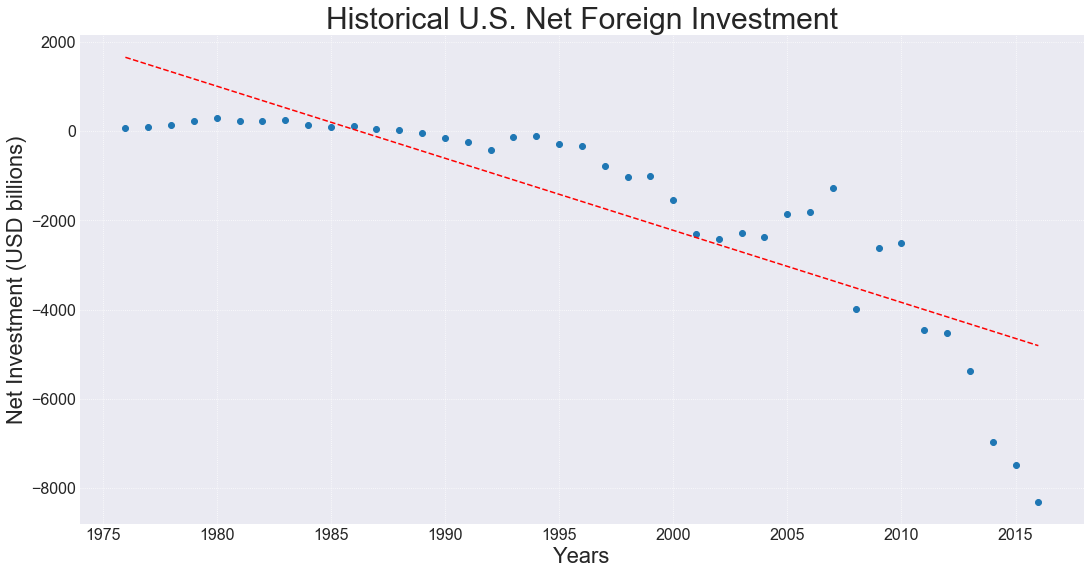

In [57]:
values_dict = series_net_investment.to_dict()

y_list = []
x_list = []
for key, value in values_dict.items():
    # print(key, value)
    y_list.append(int(value))
    x_list.append(int(key))

# plot the new values and index
fig = plt.figure(figsize=(18, 9))    
plt.scatter(x_list, y_list)
z = np.polyfit(x_list, y_list, 1)
p = np.poly1d(z)
plt.plot(x_list,p(x_list),"r--")
plt.xlabel('Years').set_size(22)
plt.ylabel('Net Investment (USD billions)').set_size(22)
plt.title('Historical U.S. Net Foreign Investment').set_size(30)
plt.xticks(size=16)
plt.yticks(size=16)
plt.grid(linestyle='dotted')
plt.show()

This graph clearly shows that U.S. net internatinal investment has declined sharply over the last 40 years.  So, the answer to our question appears to be that U.S. net foreign investment trend has been a negative one, especially from 2000 to 2015.

__ #2: Did the Subprime Crisis impact these historical trends?__

To reach an answer to this question, we will compare the periods before and after the subprime crisis.  Specifically, we will compare 5 years before 2008 (2002-2007) to 5 years after 2008 (2009-2014).

In [52]:
before_min = 2002
before_max = 2007
after_min = 2009
after_max = 2014

before_dict = {}
after_dict = {}

# create dictionary of before and after the subprime crisis
for key, value in values_dict.items():
    check = int(key)
    if check > before_min and check <= before_max:
        #print(key, value)
        before_dict[key] = value
    elif check >= after_min and check < after_max:
        #print(key, value)
        after_dict[key] = value

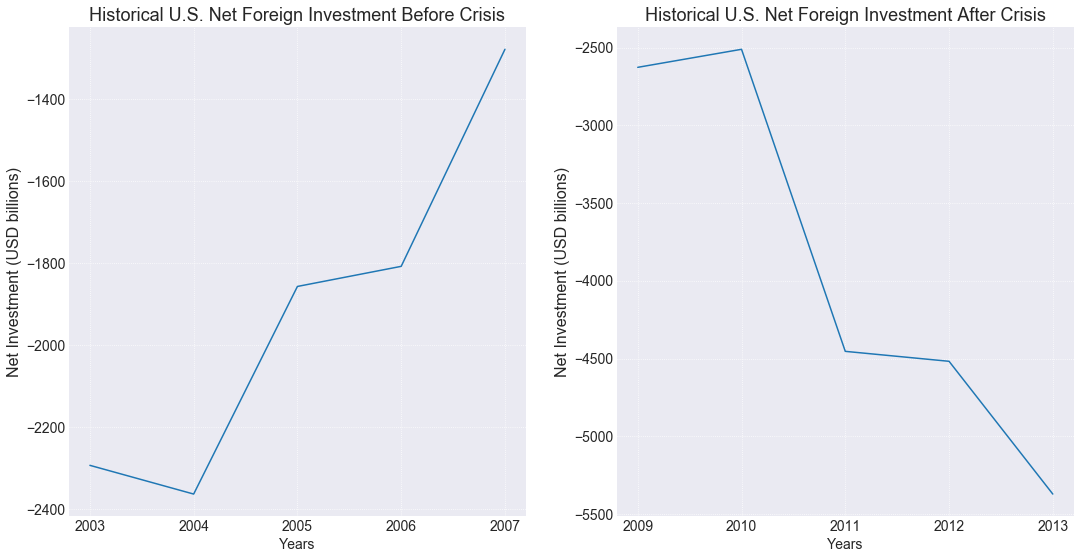

In [78]:
y_before = []
x_before = []

y_after = []
x_after = []

for key, value in before_dict.items():
    y_before.append(int(value))
    x_before.append(key)

for key, value in after_dict.items():
    y_after.append(int(value))
    x_after.append(key)

# plot the before and after crisis figures
fig = plt.figure(figsize=(18, 9)) 
plt.subplot(1, 2, 1)
plt.plot(x_before, y_before)
plt.grid(linestyle='dotted')
plt.title('Historical U.S. Net Foreign Investment Before Crisis').set_size(18)
plt.xlabel('Years').set_size(14)
plt.ylabel('Net Investment (USD billions)').set_size(16)
plt.xticks(size=14)
plt.yticks(size=14)

plt.subplot(1, 2, 2)
plt.plot(x_after, y_after)
plt.grid(linestyle='dotted')
plt.title('Historical U.S. Net Foreign Investment After Crisis').set_size(18)
plt.xlabel('Years').set_size(14)
plt.ylabel('Net Investment (USD billions)').set_size(16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

Our analysis appears to clearly answer the question. U.S. net foreign investment increased sharply in the 5 years prior to the crisis and declined rather dramatically in the 5 years after.  So, the Subprime Crisis had a negative affect on U.S. net foreign investment.

__ #3: What are some of the key drivers that led to the pre-and-post crisis changes?__

In [99]:
assets_dict = series_assets.to_dict()

y_asset = []
x_asset = []

for key, value in assets_dict.items():
    check = int(key)
    if check > 2002 and check < 2014:
        y_asset.append(int(value))
        x_asset.append(key)

In [100]:
liab_dict = series_liabilities.to_dict()

y_liab = []
x_liab = []

for key, value in liab_dict.items():
    check = int(key)
    if check > 2002 and check < 2014:
        y_liab.append(int(value))
        x_liab.append(key)

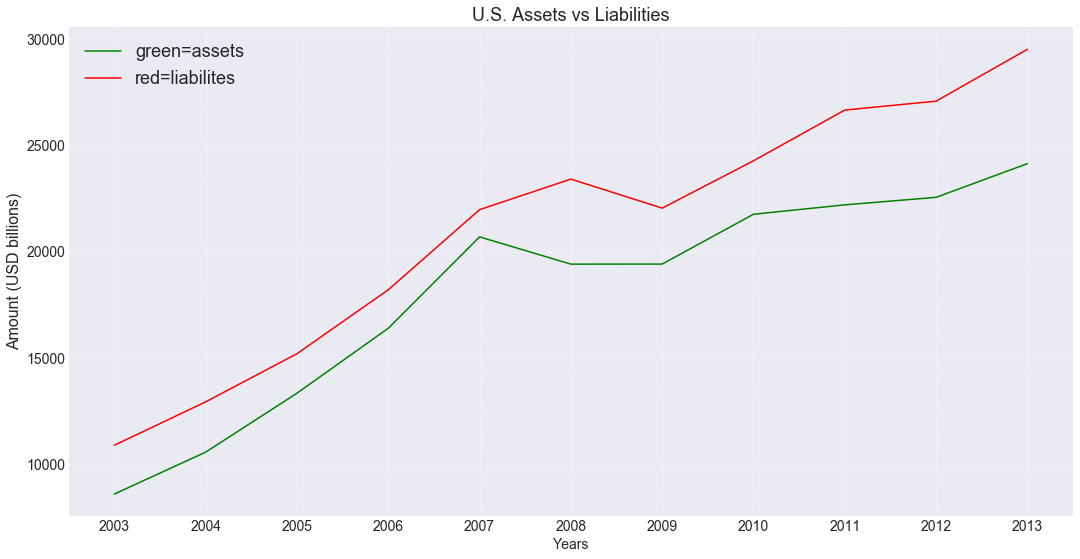

In [101]:
# plot the before and after crisis figures
fig = plt.figure(figsize=(18, 9)) 
plt.plot(x_asset, y_asset, 'g')
plt.plot(x_liab, y_liab, 'r')
plt.title('U.S. Assets vs Liabilities').set_size(18)
plt.xlabel('Years').set_size(14)
plt.ylabel('Amount (USD billions)').set_size(16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(linestyle='dotted')
plt.legend(['green=assets', 'red=liabilites'], loc='upper left', prop={'size': 18})
plt.show()

It appears clear that the key driver behind the change in U.S. foreign net investment before and after the Subprime Crisis is that following 2007 foreign liabilities began increasing faster than foreign assets.  Subtracting the more rapidly increasing liabilities from the assets, would give us the negative net investment trends we saw in our earlier analyses for question #1 and #2.

- - - -

## Proposed future research

After conducting the research for this Capstone, it is clear that more can be done to better understand the impact of different events on the economic factors such as net foreign investment.  Ultimately, I would like to learn machine learning and other techniques that would allow the construction of increasingly accurate predictive models from various financial and economic datasets.

- - - -

**Supplemental Data**


https://www.bloomberg.com/news/articles/2017-08-31/canada-s-economy-surges-4-5-on-consumer-spending-key-takeaways

https://www.imf.org/en/News/Articles/2017/05/18/NA190517Latin-America-and-the-Caribbean-Bouncing-Back-from-Recession

http://www.globalissues.org/article/768/global-financial-crisis

https://www.investopedia.com/university/credit-crisis/credit-crisis6.asp

https://www.thebalance.com/stock-market-crash-of-2008-3305535

http://knowledge.wharton.upenn.edu/article/mortgage-crisis-bailout-relief-for-some-risk-for-others/

https://www.investopedia.com/terms/d/djia.asp

https://www.investopedia.com/terms/n/nasdaq100.asp,https://www.investopedia.com/ask/answers/040215/what-does-sp-500-index-measure-and-how-it-calculated.asp?ad=dirN&qo=investopediaSiteSearch&qsrc=0&o=40186